---
title: "Multiple Regression"
date: "`r Sys.Date()`" 
format: html
---

- Using salary as the target variable
- Multiple Linear Regression
- Random Forest Regression


# Load the dataset

In [2]:
import pandas as pd

df = pd.read_csv("lightcast_job_postings.csv")

# Show the first few rows
df.info()
df.head()


/tmp/ipykernel_2191/1412111932.py:3: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lightcast_job_postings.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72498 entries, 0 to 72497
Columns: 131 entries, ID to NAICS_2022_6_NAME
dtypes: float64(38), object(93)
memory usage: 72.5+ MB


,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,...,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,9/6/2024,2024-09-06 20:32:57.352 Z,0.0,6/2/2024,6/8/2024,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",...,44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,8/2/2024,2024-08-02 17:08:58.838 Z,0.0,6/2/2024,8/1/2024,NaN,"[\n ""Job Board""\n]","[\n ""maine.gov""\n]","[\n ""https://joblink.maine.gov/jobs/1085740""\n]",...,56.0,Administrative and Support and Waste Managemen...,561.0,Administrative and Support Services,5613.0,Employment Services,56132.0,Temporary Help Services,561320.0,Temporary Help Services
2,85318b12b3331fa490d32ad014379df01855c557,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/7/2024,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dallas-tx/data-analys...",...,52.0,Finance and Insurance,524.0,Insurance Carriers and Related Activities,5242.0,"Agencies, Brokerages, and Other Insurance Rela...",52429.0,Other Insurance Related Activities,524291.0,Claims Adjusting
3,1b5c3941e54a1889ef4f8ae55b401a550708a310,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/20/2024,48.0,"[\n ""Job Board""\n]","[\n ""disabledperson.com"",\n ""dejobs.org""\n]","[\n ""https://www.disabledperson.com/jobs/5948...",...,52.0,Finance and Insurance,522.0,Credit Intermediation and Related Activities,5221.0,Depository Credit Intermediation,52211.0,Commercial Banking,522110.0,Commercial Banking
4,cb5ca25f02bdf25c13edfede7931508bfd9e858f,6/19/2024,2024-06-19 07:00:00.000 Z,0.0,6/2/2024,6/17/2024,15.0,"[\n ""FreeJobBoard""\n]","[\n ""craigslist.org""\n]","[\n ""https://modesto.craigslist.org/sls/77475...",...,99.0,Unclassified Industry,999.0,Unclassified Industry,9999.0,Unclassified Industry,99999.0,Unclassified Industry,999999.0,Unclassified Industry


# Data Cleaning

In [3]:
df[["SALARY", "EDUCATION_LEVELS_NAME", "EMPLOYMENT_TYPE_NAME", "MIN_YEARS_EXPERIENCE", "TITLE_NAME"]].isnull().sum()


SALARY                   41690
EDUCATION_LEVELS_NAME       44
EMPLOYMENT_TYPE_NAME        44
MIN_YEARS_EXPERIENCE     23146
TITLE_NAME                  44
dtype: int64

In [4]:
df_clean = df.dropna(subset=["SALARY", "MIN_YEARS_EXPERIENCE"])


# Train/Test Split

In [5]:
# Choose the feature columns and target
features = ["EDUCATION_LEVELS_NAME", "EMPLOYMENT_TYPE_NAME", "MIN_YEARS_EXPERIENCE", "TITLE_NAME"]
target = "SALARY"

# Separate the feature set (X) and target (y)
X = df_clean[features]
y = df_clean[target]

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=688)


# Fit and Evaluate the Model

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


In [7]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=688)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


## RMSE & R²

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression RMSE:", lin_rmse)
print("Linear Regression R²:", lin_r2)

# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)


Linear Regression RMSE: 27955.30096635072
Linear Regression R²: 0.5886498195386475
Random Forest RMSE: 23088.86749334533
Random Forest R²: 0.7193993902706934


## Correlation

In [10]:
df_clean[["MIN_YEARS_EXPERIENCE", "SALARY"]].corr()


,MIN_YEARS_EXPERIENCE,SALARY
MIN_YEARS_EXPERIENCE,1.000000,0.510461
SALARY,0.510461,1.000000


## Feature Importance (for Random Forest)

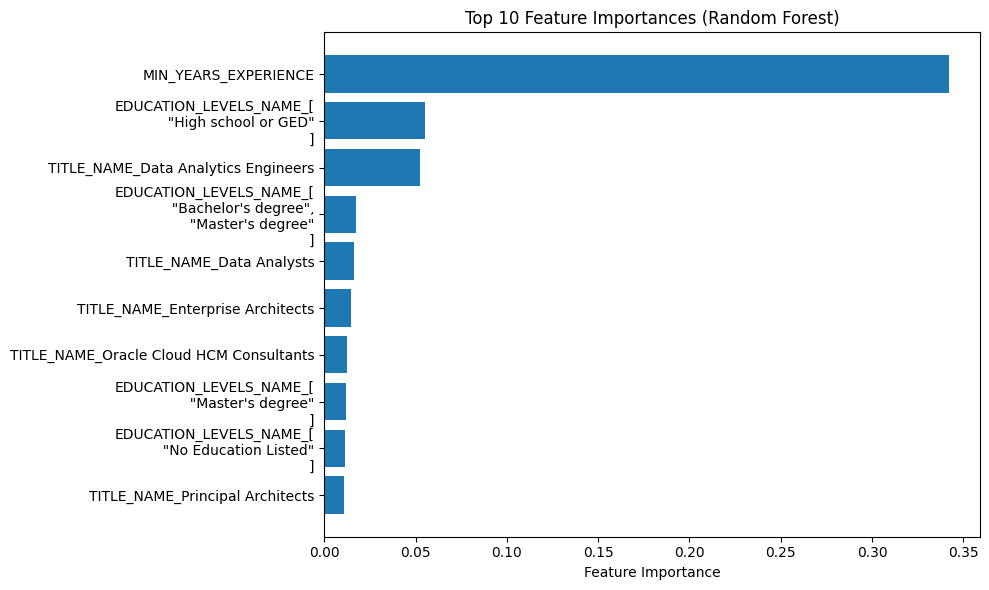

In [12]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_reg.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier sorting/plotting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][:10], feat_imp_df["Importance"][:10])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Residual Analysis (for Regression)

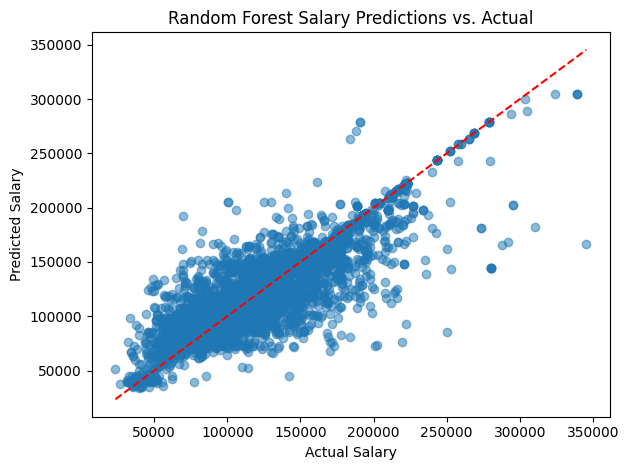

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest Salary Predictions vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


## Salary by State

/tmp/ipykernel_2191/3598599449.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




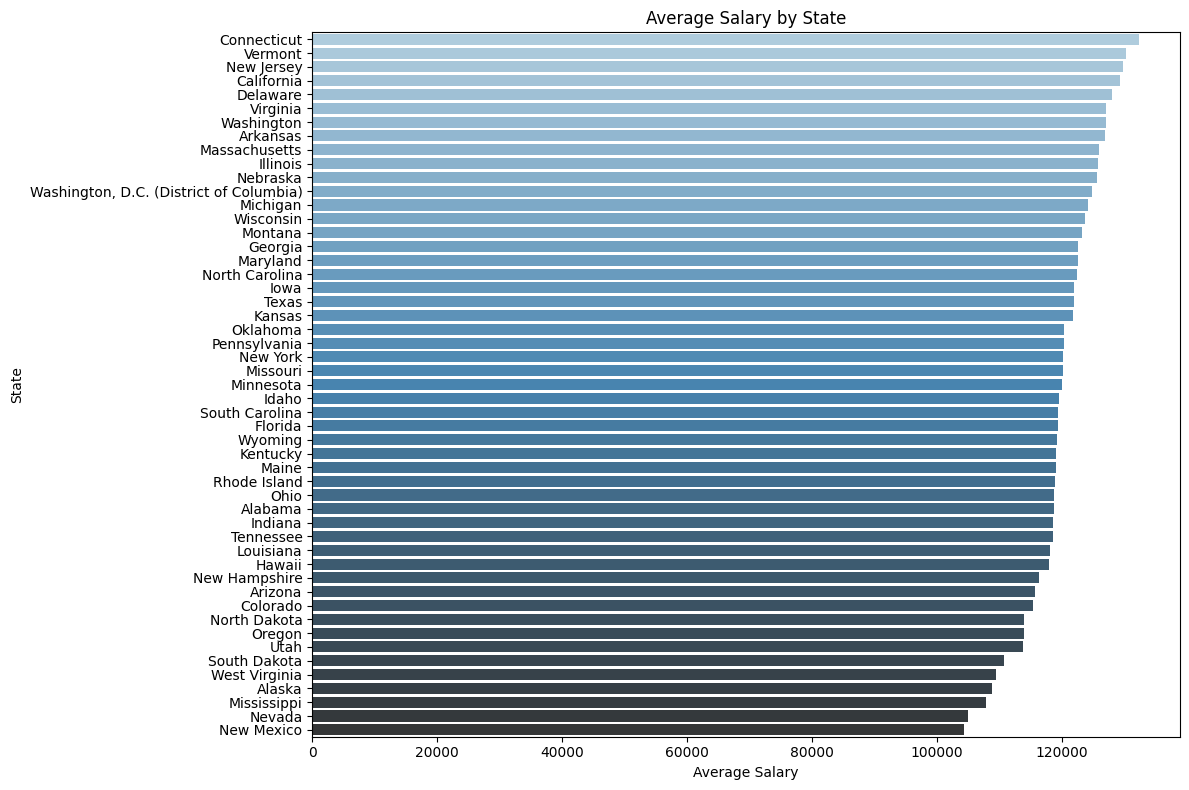

In [28]:
import pandas as pd
import seaborn as sns

# Group by state and calculate mean salary
salary_by_state = df_clean.groupby("STATE_NAME")["SALARY"].mean().sort_values(ascending=False).reset_index()

# Set up the figure
plt.figure(figsize=(12, 8))
sns.barplot(data=salary_by_state, x="SALARY", y="STATE_NAME", palette="Blues_d")

# Add labels and title
plt.xlabel("Average Salary")
plt.ylabel("State")
plt.title("Average Salary by State")
plt.tight_layout()
plt.show()


## Remote vs On-site by State or Industry

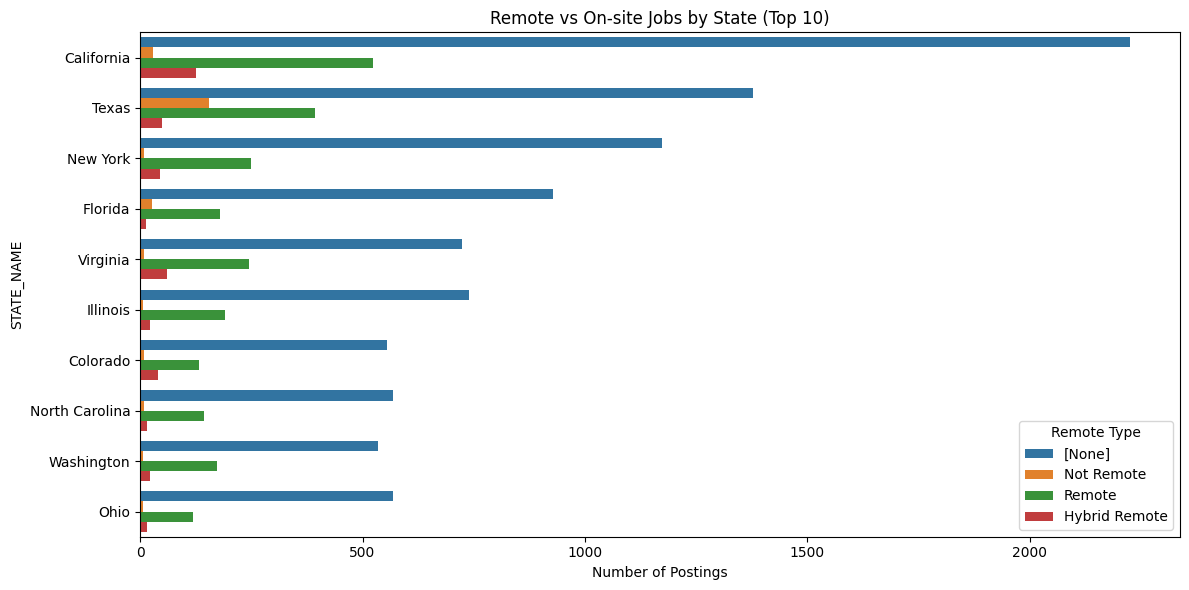

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of remote types by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, y="STATE_NAME", hue="REMOTE_TYPE_NAME", order=df_clean["STATE_NAME"].value_counts().index[:10])
plt.title("Remote vs On-site Jobs by State (Top 10)")
plt.xlabel("Number of Postings")
plt.legend(title="Remote Type")
plt.tight_layout()
plt.show()
